## Data Pre-Processing

In [3]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importing dataset
dataset = pd.read_csv('datasets/full.csv')

# Separate dataset (X) and dependent vector (y)
X = dataset.filter(items=['Age'])
y = dataset.filter(items=['Survived'])

# Handle Missing values
## Filling missing
X.fillna(X.mean(), inplace=True)

# Splitting Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Polynomial Linear Regression

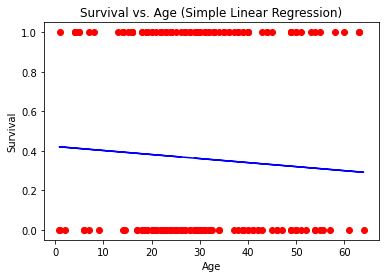

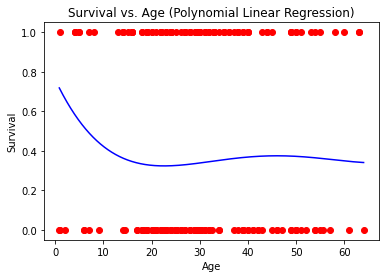

In [8]:
# Fitting Linear regression to the dataset for reference to new polynomial regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=4)
X_train_poly = pd.DataFrame(pr.fit_transform(X_train), columns=['Age^0', 'Age^1', 'Age^2', 'Age^3', 'Age^4'])
lr_2 = LinearRegression()
lr_2.fit(X_train_poly, y_train)

# Visualize result of simple linear regression
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, lr.predict(X_test), color='blue')
plt.title('Survival vs. Age (Simple Linear Regression)')
plt.xlabel('Age')
plt.ylabel('Survival')
plt.show()

# Visualize result of polynomial linear regression
X_test_interp = np.arange(X_test['Age'].min(), X_test['Age'].max(), 0.01)
X_test_interp = X_test_interp.reshape(-1, 1)
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test_interp, lr_2.predict(pr.fit_transform(X_test_interp)), color='blue')
plt.title('Survival vs. Age (Polynomial Linear Regression)')
plt.xlabel('Age')
plt.ylabel('Survival')
plt.show()
